In [200]:
# here we are importing the all necessary packages
from imblearn.under_sampling import RandomUnderSampler

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
import numpy as np
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.svm import SVC
# using one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [201]:
# code for printing the confusion matrix
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823i
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [202]:
# reading the data using pandas
data=pd.read_csv('/content/drive/My Drive/Artificial engineering/diabetic_data.csv')
print("Number of data points:",data.shape[0])

condition = data['readmitted']=='<30'
data['readmitted'] = np.where(condition,1,0)

Number of data points: 101766


In [203]:
#  splitting inot x and y
y=data['readmitted']
X=data.drop(columns=['readmitted'])

In [204]:
# printing the data columns
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [205]:
# printing the data types
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [206]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [207]:
# taking all categroical data and convert into one hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train['race'].values.reshape(-1,1))
X_train_race=enc.transform(X_train['race'].values.reshape(-1,1))
X_test_race=enc.transform(X_test['race'].values.reshape(-1,1))
enc.fit(X_train['gender'].values.reshape(-1,1))
X_train_gender=enc.transform(X_train['gender'].values.reshape(-1,1))
X_test_gender=enc.transform(X_test['gender'].values.reshape(-1,1))
enc.fit(X_train['age'].values.reshape(-1,1))
X_train_age=enc.transform(X_train['age'].values.reshape(-1,1))
X_test_age=enc.transform(X_test['age'].values.reshape(-1,1))
enc.fit(X_train['weight'].values.reshape(-1,1))
X_train_weight=enc.transform(X_train['weight'].values.reshape(-1,1))
X_test_weight=enc.transform(X_test['weight'].values.reshape(-1,1))
enc.fit(X_train['payer_code'].values.reshape(-1,1))
X_train_payer_code=enc.transform(X_train['payer_code'].values.reshape(-1,1))
X_test_payer_code=enc.transform(X_test['payer_code'].values.reshape(-1,1))
enc.fit(X_train['medical_specialty'].values.reshape(-1,1))
X_train_medical_specialty=enc.transform(X_train['medical_specialty'].values.reshape(-1,1))
X_test_medical_specialty=enc.transform(X_test['medical_specialty'].values.reshape(-1,1))
enc.fit(X_train['diag_1'].values.reshape(-1,1))
X_train_diag_1=enc.transform(X_train['diag_1'].values.reshape(-1,1))
X_test_diag_1=enc.transform(X_test['diag_1'].values.reshape(-1,1))
enc.fit(X_train['diag_2'].values.reshape(-1,1))
X_train_diag_2=enc.transform(X_train['diag_2'].values.reshape(-1,1))
X_test_diag_2=enc.transform(X_test['diag_2'].values.reshape(-1,1))
enc.fit(X_train['diag_3'].values.reshape(-1,1))
X_train_diag_3=enc.transform(X_train['diag_3'].values.reshape(-1,1))
X_test_diag_3=enc.transform(X_test['diag_3'].values.reshape(-1,1))
enc.fit(X_train['max_glu_serum'].values.reshape(-1,1))
X_train_max_glu_serum=enc.transform(X_train['max_glu_serum'].values.reshape(-1,1))
X_test_max_glu_serum=enc.transform(X_test['max_glu_serum'].values.reshape(-1,1))
enc.fit(X_train['A1Cresult'].values.reshape(-1,1))
X_train_A1Cresult=enc.transform(X_train['A1Cresult'].values.reshape(-1,1))
X_test_A1Cresult=enc.transform(X_test['A1Cresult'].values.reshape(-1,1))
enc.fit(X_train['metformin'].values.reshape(-1,1))
X_train_metformin=enc.transform(X_train['metformin'].values.reshape(-1,1))
X_test_metformin=enc.transform(X_test['metformin'].values.reshape(-1,1))
enc.fit(X_train['metformin'].values.reshape(-1,1))
X_train_metformin=enc.transform(X_train['metformin'].values.reshape(-1,1))
X_test_metformin=enc.transform(X_test['metformin'].values.reshape(-1,1))
enc.fit(X_train['repaglinide'].values.reshape(-1,1))
X_train_repaglinide=enc.transform(X_train['repaglinide'].values.reshape(-1,1))
X_test_repaglinide=enc.transform(X_test['repaglinide'].values.reshape(-1,1))
enc.fit(X_train['nateglinide'].values.reshape(-1,1))
X_train_nateglinide=enc.transform(X_train['nateglinide'].values.reshape(-1,1))
X_test_nateglinide=enc.transform(X_test['nateglinide'].values.reshape(-1,1))
enc.fit(X_train['chlorpropamide'].values.reshape(-1,1))
X_train_chlorpropamide=enc.transform(X_train['chlorpropamide'].values.reshape(-1,1))
X_test_chlorpropamide=enc.transform(X_test['chlorpropamide'].values.reshape(-1,1))
enc.fit(X_train['glimepiride'].values.reshape(-1,1))
X_train_glimepiride=enc.transform(X_train['glimepiride'].values.reshape(-1,1))
X_test_glimepiride=enc.transform(X_test['glimepiride'].values.reshape(-1,1))
enc.fit(X_train['acetohexamide'].values.reshape(-1,1))
X_train_acetohexamide=enc.transform(X_train['acetohexamide'].values.reshape(-1,1))
X_test_acetohexamide=enc.transform(X_test['acetohexamide'].values.reshape(-1,1))
enc.fit(X_train['glipizide'].values.reshape(-1,1))
X_train_glipizide=enc.transform(X_train['glipizide'].values.reshape(-1,1))
X_test_glipizide=enc.transform(X_test['glipizide'].values.reshape(-1,1))
enc.fit(X_train['glyburide'].values.reshape(-1,1))
X_train_glyburide=enc.transform(X_train['glyburide'].values.reshape(-1,1))
X_test_glyburide=enc.transform(X_test['glyburide'].values.reshape(-1,1))
enc.fit(X_train['tolbutamide'].values.reshape(-1,1))
X_train_tolbutamide=enc.transform(X_train['tolbutamide'].values.reshape(-1,1))
X_test_tolbutamide=enc.transform(X_test['tolbutamide'].values.reshape(-1,1))
enc.fit(X_train['pioglitazone'].values.reshape(-1,1))
X_train_pioglitazone=enc.transform(X_train['pioglitazone'].values.reshape(-1,1))
X_test_pioglitazone=enc.transform(X_test['pioglitazone'].values.reshape(-1,1))
enc.fit(X_train['rosiglitazone'].values.reshape(-1,1))
X_train_rosiglitazone=enc.transform(X_train['rosiglitazone'].values.reshape(-1,1))
X_test_rosiglitazone=enc.transform(X_test['rosiglitazone'].values.reshape(-1,1))
enc.fit(X_train['acarbose'].values.reshape(-1,1))
X_train_acarbose=enc.transform(X_train['acarbose'].values.reshape(-1,1))
X_test_acarbose=enc.transform(X_test['acarbose'].values.reshape(-1,1))
enc.fit(X_train['miglitol'].values.reshape(-1,1))
X_train_miglitol=enc.transform(X_train['miglitol'].values.reshape(-1,1))
X_test_miglitol=enc.transform(X_test['miglitol'].values.reshape(-1,1))
enc.fit(X_train['troglitazone'].values.reshape(-1,1))
X_train_troglitazone=enc.transform(X_train['troglitazone'].values.reshape(-1,1))
X_test_troglitazone=enc.transform(X_test['troglitazone'].values.reshape(-1,1))
enc.fit(X_train['tolazamide'].values.reshape(-1,1))
X_train_tolazamide=enc.transform(X_train['tolazamide'].values.reshape(-1,1))
X_test_tolazamide=enc.transform(X_test['tolazamide'].values.reshape(-1,1))
enc.fit(X_train['examide'].values.reshape(-1,1))
X_train_examide=enc.transform(X_train['examide'].values.reshape(-1,1))
X_test_examide=enc.transform(X_test['examide'].values.reshape(-1,1))
enc.fit(X_train['citoglipton'].values.reshape(-1,1))
X_train_citoglipton=enc.transform(X_train['citoglipton'].values.reshape(-1,1))
X_test_citoglipton=enc.transform(X_test['citoglipton'].values.reshape(-1,1))
enc.fit(X_train['insulin'].values.reshape(-1,1))
X_train_insulin=enc.transform(X_train['insulin'].values.reshape(-1,1))
X_test_insulin=enc.transform(X_test['insulin'].values.reshape(-1,1))
enc.fit(X_train['glyburide-metformin'].values.reshape(-1,1))
X_train_glyburide_metformin=enc.transform(X_train['glyburide-metformin'].values.reshape(-1,1))
X_test_glyburide_metformin=enc.transform(X_test['glyburide-metformin'].values.reshape(-1,1))
enc.fit(X_train['glipizide-metformin'].values.reshape(-1,1))
X_train_glipizide_metformin=enc.transform(X_train['glipizide-metformin'].values.reshape(-1,1))
X_test_glipizide_metformin=enc.transform(X_test['glipizide-metformin'].values.reshape(-1,1))
enc.fit(X_train['metformin-rosiglitazone'].values.reshape(-1,1))
X_train_metformin_rosiglitazone=enc.transform(X_train['metformin-rosiglitazone'].values.reshape(-1,1))
X_test_metformin_rosiglitazone=enc.transform(X_test['metformin-rosiglitazone'].values.reshape(-1,1))
enc.fit(X_train['glimepiride-pioglitazone'].values.reshape(-1,1))
X_train_glimepiride_pioglitazone=enc.transform(X_train['glimepiride-pioglitazone'].values.reshape(-1,1))
X_test_glimepiride_pioglitazone=enc.transform(X_test['glimepiride-pioglitazone'].values.reshape(-1,1))
enc.fit(X_train['metformin-rosiglitazone'].values.reshape(-1,1))
X_train_metformin_rosiglitazone=enc.transform(X_train['metformin-rosiglitazone'].values.reshape(-1,1))
X_test_metformin_rosiglitazone=enc.transform(X_test['metformin-rosiglitazone'].values.reshape(-1,1))
enc.fit(X_train['metformin-pioglitazone'].values.reshape(-1,1))
X_train_metformin_pioglitazone=enc.transform(X_train['metformin-pioglitazone'].values.reshape(-1,1))
X_test_metformin_pioglitazone=enc.transform(X_test['metformin-pioglitazone'].values.reshape(-1,1))
enc.fit(X_train['change'].values.reshape(-1,1))
X_train_change=enc.transform(X_train['change'].values.reshape(-1,1))
X_test_change=enc.transform(X_test['change'].values.reshape(-1,1))
enc.fit(X_train['diabetesMed'].values.reshape(-1,1))
X_train_diabetesMed=enc.transform(X_train['diabetesMed'].values.reshape(-1,1))
X_test_diabetesMed=enc.transform(X_test['diabetesMed'].values.reshape(-1,1))
enc.fit(X_train['admission_type_id'].values.reshape(-1,1))
X_train_admission_type_id=enc.transform(X_train['admission_type_id'].values.reshape(-1,1))
X_test_admission_type_id=enc.transform(X_test['admission_type_id'].values.reshape(-1,1))
enc.fit(X_train['discharge_disposition_id'].values.reshape(-1,1))
X_train_discharge_disposition_id=enc.transform(X_train['discharge_disposition_id'].values.reshape(-1,1))
X_test_discharge_disposition_id=enc.transform(X_test['discharge_disposition_id'].values.reshape(-1,1))
enc.fit(X_train['admission_source_id'].values.reshape(-1,1))
X_train_admission_source_id=enc.transform(X_train['admission_source_id'].values.reshape(-1,1))
X_test_admission_source_id=enc.transform(X_test['admission_source_id'].values.reshape(-1,1))

In [208]:
# normalising the numerical data
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['patient_nbr'].values.reshape(1,-1))
X_train_patient_nbr = normalizer.transform(X_train['patient_nbr'].values.reshape(1,-1))
X_test_patient_nbr = normalizer.transform(X_test['patient_nbr'].values.reshape(1,-1))
normalizer.fit(X_train['time_in_hospital'].values.reshape(1,-1))
X_train_time_in_hospital = normalizer.transform(X_train['time_in_hospital'].values.reshape(1,-1))
X_test_time_in_hospital = normalizer.transform(X_test['time_in_hospital'].values.reshape(1,-1))
normalizer.fit(X_train['num_lab_procedures'].values.reshape(1,-1))
X_train_num_lab_procedures = normalizer.transform(X_train['num_lab_procedures'].values.reshape(1,-1))
X_test_num_lab_procedures = normalizer.transform(X_test['num_lab_procedures'].values.reshape(1,-1))
normalizer.fit(X_train['num_procedures'].values.reshape(1,-1))
X_train_num_procedures = normalizer.transform(X_train['num_procedures'].values.reshape(1,-1))
X_test_num_procedures = normalizer.transform(X_test['num_procedures'].values.reshape(1,-1))
normalizer.fit(X_train['num_medications'].values.reshape(1,-1))
X_train_num_medications = normalizer.transform(X_train['num_medications'].values.reshape(1,-1))
X_test_num_medications = normalizer.transform(X_test['num_medications'].values.reshape(1,-1))
normalizer.fit(X_train['number_outpatient'].values.reshape(1,-1))
X_train_number_outpatient = normalizer.transform(X_train['number_outpatient'].values.reshape(1,-1))
X_test_number_outpatient = normalizer.transform(X_test['number_outpatient'].values.reshape(1,-1))
normalizer.fit(X_train['number_emergency'].values.reshape(1,-1))
X_train_number_emergency = normalizer.transform(X_train['number_emergency'].values.reshape(1,-1))
X_test_number_emergency = normalizer.transform(X_test['number_emergency'].values.reshape(1,-1))
normalizer.fit(X_train['number_inpatient'].values.reshape(1,-1))
X_train_number_inpatient = normalizer.transform(X_train['number_inpatient'].values.reshape(1,-1))
X_test_number_inpatient = normalizer.transform(X_test['number_inpatient'].values.reshape(1,-1))
normalizer.fit(X_train['number_diagnoses'].values.reshape(1,-1))
X_train_number_diagnoses = normalizer.transform(X_train['number_diagnoses'].values.reshape(1,-1))
X_test_number_diagnoses = normalizer.transform(X_test['number_diagnoses'].values.reshape(1,-1))
X_train_patient_nbr =X_train_patient_nbr.reshape(-1,1)
X_test_patient_nbr =X_test_patient_nbr.reshape(-1,1)
X_train_time_in_hospital =X_train_time_in_hospital.reshape(-1,1)
X_test_time_in_hospital =X_test_time_in_hospital.reshape(-1,1)
X_train_num_lab_procedures = X_train_num_lab_procedures.reshape(-1,1)
X_test_num_lab_procedures = X_test_num_lab_procedures.reshape(-1,1)
X_train_num_procedures =X_train_num_procedures.reshape(-1,1)
X_test_num_procedures = X_test_num_procedures.reshape(-1,1)
X_train_num_medications = X_train_num_medications.reshape(-1,1)
X_test_num_medications = X_test_num_medications.reshape(-1,1)
X_train_number_outpatient =X_train_number_outpatient.reshape(-1,1)
X_test_number_outpatient = X_test_number_outpatient.reshape(-1,1)
X_train_number_emergency =X_train_number_emergency.reshape(-1,1)
X_test_number_emergency =X_test_number_emergency.reshape(-1,1)
X_train_number_inpatient =X_train_number_inpatient.reshape(-1,1)
X_test_number_inpatient = X_test_number_inpatient.reshape(-1,1)
X_train_number_diagnoses = X_train_number_diagnoses.reshape(-1,1)
X_test_number_diagnoses =X_test_number_diagnoses.reshape(-1,1)


In [209]:
# stacking
from scipy.sparse import hstack
X_train = hstack((X_train_race,X_train_gender,X_train_age,X_train_weight,X_train_payer_code,X_train_medical_specialty,X_train_diag_1,X_train_diag_2,X_train_diag_3,X_train_max_glu_serum,X_train_A1Cresult,X_train_metformin,X_train_repaglinide,X_train_nateglinide,X_train_chlorpropamide,X_train_glimepiride,X_train_acetohexamide,X_train_glipizide,X_train_glyburide,X_train_tolbutamide,X_train_pioglitazone,X_train_rosiglitazone,X_train_acarbose,X_train_miglitol,X_train_troglitazone,X_train_tolazamide,X_train_examide,X_train_citoglipton,X_train_insulin,X_train_glyburide_metformin,X_train_glipizide_metformin,X_train_glimepiride_pioglitazone,X_train_metformin_rosiglitazone,X_train_metformin_pioglitazone,X_train_change,X_train_diabetesMed,X_train_admission_type_id,X_train_discharge_disposition_id,X_train_admission_source_id,X_train_patient_nbr,X_train_time_in_hospital,X_train_num_lab_procedures,X_train_num_procedures,X_train_num_medications,X_train_number_outpatient,X_train_number_emergency,X_train_number_inpatient,X_train_number_diagnoses)).tocsr()
X_test = hstack((X_test_race,X_test_gender,X_test_age,X_test_weight,X_test_payer_code,X_test_medical_specialty,X_test_diag_1,X_test_diag_2,X_test_diag_3,X_test_max_glu_serum,X_test_A1Cresult,X_test_metformin,X_test_repaglinide,X_test_nateglinide,X_test_chlorpropamide,X_test_glimepiride,X_test_acetohexamide,X_test_glipizide,X_test_glyburide,X_test_tolbutamide,X_test_pioglitazone,X_test_rosiglitazone,X_test_acarbose,X_test_miglitol,X_test_troglitazone,X_test_tolazamide,X_test_examide,X_test_citoglipton,X_test_insulin,X_test_glyburide_metformin,X_test_glipizide_metformin,X_test_glimepiride_pioglitazone,X_test_metformin_rosiglitazone,X_test_metformin_pioglitazone,X_test_change,X_test_diabetesMed,X_test_admission_type_id,X_test_discharge_disposition_id,X_test_admission_source_id,X_test_patient_nbr,X_test_time_in_hospital,X_test_num_lab_procedures,X_test_num_procedures,X_test_num_medications,X_test_number_outpatient,X_test_number_emergency,X_test_number_inpatient,X_test_number_diagnoses)).tocsr()


In [210]:
#https://stackoverflow.com/a/45386397/13693423
# function to select k best features which returns new dataset
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=150)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [211]:
# to get the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [212]:
# selecting important features
X_train_fs=X_train_fs.toarray()
X_test_fs=X_test_fs.toarray()

# Logistic regression

Logistic regression
Test confusion matrix
auc is 0.62
Accuracy is 0.66
Precision is 0.18
Recall is 0.58
f1-score is 0.27


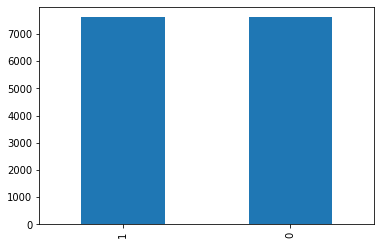

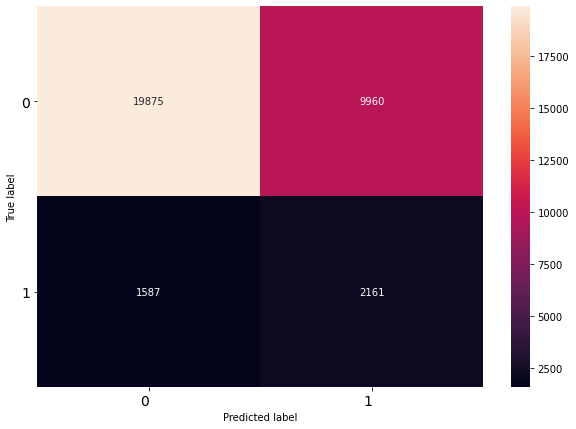

In [213]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# function to try on different sets of ratio for smote

# here upsampling is done for imbalanced data
under = RandomUnderSampler()
X_train_fs, y_train = under.fit_resample(X_train_fs, y_train.ravel())
#here bar plot shows equal distribution after upsampling
pd.Series(y_train).value_counts().plot.bar()
# here the scaling is done  x train
scaler = StandardScaler()
X_train_fs=scaler.fit_transform(X_train_fs)
X_test_fs=scaler.transform(X_test_fs)
# here using cross validation and gridsearch to determine the best hyperparameter 
logit = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(logit, param_grid,scoring='roc_auc',cv=5,n_jobs=-1)
clf.fit(X_train_fs,y_train)
# selecting the best model and printing the confusion matrix
logit =clf.best_estimator_ 
logit_pred = logit.predict(X_test_fs)
logit_pred_train=logit.predict(X_train_fs)
print_confusion_matrix(confusion_matrix(y_test,logit_pred),['0','1'])
print("Logistic regression")
print("Test confusion matrix")
 # printing the accuracy preicison,recall,f1-score from logistic regression
fpr, tpr, thresholds = metrics.roc_curve(y_test,logit_pred)
print('auc is {0:.2f}'.format(metrics.auc(fpr, tpr)))
log_auc=format(metrics.auc(fpr, tpr))
log_f1_score=format(f1_score(y_test, logit_pred))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))
print("f1-score is {0:.2f}".format(f1_score(y_test, logit_pred)))


    

# Decision tree

Decision tree
Test confusion matrix
auc is 0.62
Accuracy is 0.64
Precision is 0.17
Recall is 0.58
f1 is 0.27


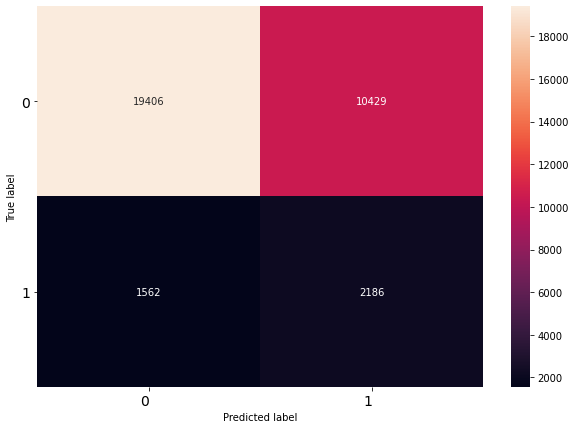

In [214]:
# decison tree
# here using cross validation and gridsearch to determine the best hyperparameter 
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
dtree = DecisionTreeClassifier()
clf = GridSearchCV(dtree,parameters,scoring='roc_auc',cv=5,n_jobs=-1)
clf.fit(X_train_fs,y_train)
    # selecting the best model and printing the confusion matrix
dtree =clf.best_estimator_ 
dtree.fit(X_train_fs,y_train)
dtree_pred = dtree.predict(X_test_fs)
    
print_confusion_matrix(confusion_matrix(y_test,dtree_pred),['0','1'])
print("Decision tree")
print("Test confusion matrix")
    
    # printing the accuracy preicison,recall,f1-score from logistic regression
fpr, tpr, thresholds = metrics.roc_curve(y_test,dtree_pred)
print('auc is {0:.2f}'.format(metrics.auc(fpr, tpr)))
decision_auc=format(metrics.auc(fpr, tpr))
decision_f1=format(f1_score(y_test, dtree_pred))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))
print("f1 is {0:.2f}".format(f1_score(y_test, dtree_pred)))


# Random forest

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished


random forest
Test confusion matrix
auc is 0.62
Accuracy is 0.63
Precision is 0.17
Recall is 0.61
f1score is 0.27


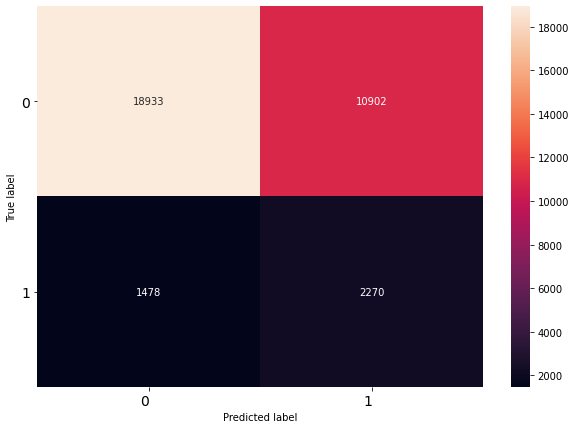

In [215]:
    # doing hyperparameter tuning for random forest
rm = RandomForestClassifier()
params={'n_estimators':[5,10,25,50,100,300,500],'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50,75,100, None], 'bootstrap': [True, False]}
model_rf=GridSearchCV(rm,param_grid=params,cv=5,scoring='roc_auc',n_jobs=-1,verbose=1)
model_rf.fit(X_train_fs, y_train)
rm =model_rf.best_estimator_
rm.fit(X_train_fs,y_train)
rm_prd = rm.predict(X_test_fs)

# selecting the best model and printing the confusion matrix
print_confusion_matrix(confusion_matrix(y_test,rm_prd),['0','1'])
print("random forest")
print("Test confusion matrix")
 # printing the accuracy preicison,recall,f1-score from logistic regression
fpr, tpr, thresholds = metrics.roc_curve(y_test,rm_prd)
print('auc is {0:.2f}'.format(metrics.auc(fpr, tpr)))
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))
print("f1score is {0:.2f}".format(f1_score(y_test, rm_prd)))    
rm_auc=format(metrics.auc(fpr, tpr))
rm_f1=format(f1_score(y_test, rm_prd))

# feature importance

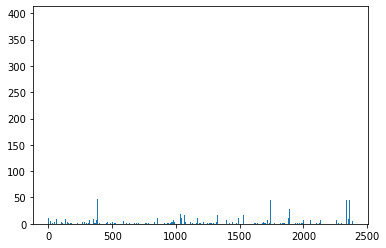

In [216]:
# feature importance plot
from matplotlib import pyplot
#for i in range(len(fs.scores_)):
#    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# predicting the probability of the model using the decision tree and random forest

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished


combined accuracy
Test confusion matrix
auc is 0.63
Precision is 0.18
Recall is 0.60
f1score is 0.27


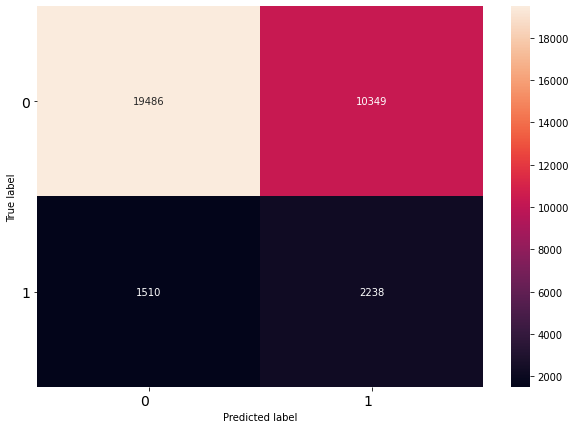

In [217]:
# in the believe function i wrote the code for weighted average with markdown
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.calibration import CalibratedClassifierCV
# function to do weighted average
# used decision tree
decision = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
clf = GridSearchCV(decision, param_grid,scoring='roc_auc',cv=5,n_jobs=-1)
clf.fit(X_train_fs,y_train)
decision =clf.best_estimator_ 
sig_clf = CalibratedClassifierCV(decision, method="sigmoid")
sig_clf.fit(X_train_fs, y_train)
    # used calibrated classifer to get the probability using decision tree
predict_y_decision = sig_clf.predict_proba(X_test_fs)
    # used random forest classifier
rm = RandomForestClassifier()
params={'n_estimators':[5,10,25,50,100,300,500],'n_estimators': [10, 25], 'max_features': [5, 10], 
     'max_depth': [10, 50,75,100, None], 'bootstrap': [True, False]}
model_rf=GridSearchCV(rm,param_grid=params,cv=5,scoring='roc_auc',n_jobs=-1,verbose=1)
model_rf.fit(X_train_fs, y_train)
rm =model_rf.best_estimator_
sig_clf = CalibratedClassifierCV(rm, method="sigmoid")
sig_clf.fit(X_train_fs, y_train)
    # used calibrated classifer to get the correct probability predicitons
predict_y_rm = sig_clf.predict_proba(X_test_fs)
one,two=predict_y_decision,predict_y_rm
z=[]
    # added the probability of both the predictions
for i in range(len(one)):
  z.append([one[i][0]+two[i][0],one[i][1]+two[i][1]])
predicted=[]
# using argmax got the output and checked for the answer
for i in range(len(z)):
  predicted.append(np.argmax(z[i]))
print_confusion_matrix(confusion_matrix(y_test,predicted),['0','1'])
print("combined accuracy")
print("Test confusion matrix")
# printing the accuracy preicison,recall,f1-score from logistic regression
fpr, tpr, thresholds = metrics.roc_curve(y_test,predicted)
print('auc is {0:.2f}'.format(metrics.auc(fpr, tpr)))
print("Precision is {0:.2f}".format(precision_score(y_test,predicted)))
print("Recall is {0:.2f}".format(recall_score(y_test,predicted)))
print("f1score is {0:.2f}".format(f1_score(y_test,predicted)))
avgweight_auc=format(metrics.auc(fpr, tpr))
avgweight_f1=format(f1_score(y_test,predicted))

In [219]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytab
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","f1-score","TEST AUC"]
x.add_row(["ONE HOT ENCODING","LOGISTIC REGRESSION",round(float(log_f1_score),2),round(float(log_auc),2)])
x.add_row(["ONE HOT ENCODING","DECISION TREE",round(float(decision_f1),2),round(float(decision_auc),2)])
x.add_row(["ONE HOT ENCODING","RANDOM FOREST",round(float(rm_f1),2),round(float(rm_auc),2)])
x.add_row(["ONE HOT ENCODING","COMBINED DECISION TREE RANDOM FOREST",round(float(avgweight_f1),2),round(float(avgweight_auc),2)])
print(x)


+------------------+--------------------------------------+----------+----------+
|    Vectorizer    |                Model                 | f1-score | TEST AUC |
+------------------+--------------------------------------+----------+----------+
| ONE HOT ENCODING |         LOGISTIC REGRESSION          |   0.27   |   0.62   |
| ONE HOT ENCODING |            DECISION TREE             |   0.27   |   0.62   |
| ONE HOT ENCODING |            RANDOM FOREST             |   0.27   |   0.62   |
| ONE HOT ENCODING | COMBINED DECISION TREE RANDOM FOREST |   0.27   |   0.63   |
+------------------+--------------------------------------+----------+----------+


# predicting using deep learning

In [ ]:
# simple deep learning model
k = tensorflow.keras.initializers.he_uniform(seed=None)
inputlayer=Input(shape=(X_test_fs.shape[1]),name='input')
dense=Dense(128,activation='relu',kernel_initializer=k)(inputlayer)
dense1=Dense(64,activation='relu',kernel_initializer=k)(dense)
output=Dense(1, activation='sigmoid',kernel_initializer=k)(dense1)
model=Model(inputs=inputlayer,outputs=output)
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy',tensorflow.keras.metrics.AUC()])


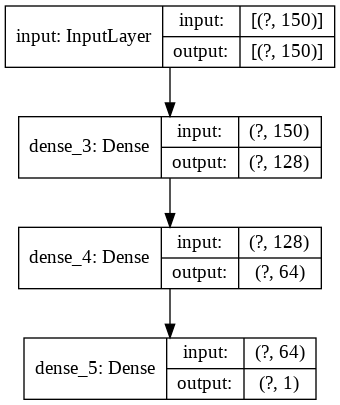

In [ ]:
# plt of the model simple dl model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:

model= model.fit(X_train_fs,y_train,validation_data=(X_test_fs, y_test), epochs=5)

Epoch 1/5
476/476 [==============================] - 6s 12ms/step - loss: 0.6718 - accuracy: 0.5989 - auc_1: 0.6413 - val_loss: 0.7363 - val_accuracy: 0.5803 - val_auc_1: 0.6565
Epoch 2/5
476/476 [==============================] - 5s 11ms/step - loss: 0.6259 - accuracy: 0.6452 - auc_1: 0.7015 - val_loss: 0.6711 - val_accuracy: 0.6526 - val_auc_1: 0.6557
Epoch 3/5
476/476 [==============================] - 5s 11ms/step - loss: 0.6116 - accuracy: 0.6595 - auc_1: 0.7203 - val_loss: 0.6524 - val_accuracy: 0.6608 - val_auc_1: 0.6534
Epoch 4/5
476/476 [==============================] - 5s 11ms/step - loss: 0.5998 - accuracy: 0.6705 - auc_1: 0.7351 - val_loss: 0.6924 - val_accuracy: 0.6127 - val_auc_1: 0.6535
Epoch 5/5
476/476 [==============================] - 5s 11ms/step - loss: 0.5868 - accuracy: 0.6817 - auc_1: 0.7508 - val_loss: 0.7127 - val_accuracy: 0.6150 - val_auc_1: 0.6522


# plot of the history

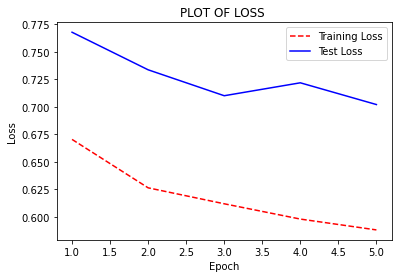

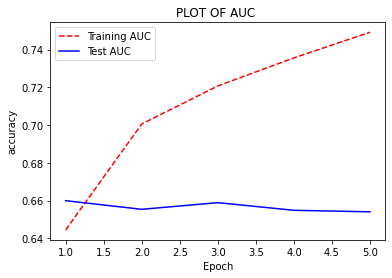

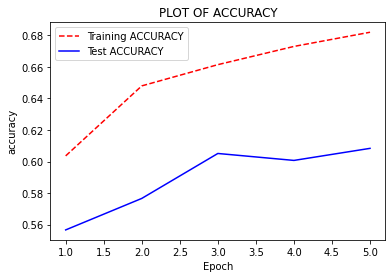

In [ ]:
# printing the plot of accuracy and loss and auc
it=model.history

import matplotlib.pyplot as plt
training_loss = it['loss']
test_loss = it['val_loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("PLOT OF LOSS ")
plt.show();
training_accuracy = it['auc']
test_accuracy = it['val_auc']
# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)
# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training AUC', 'Test AUC'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title("PLOT OF AUC ")
plt.show()
training_accuracy1 = it['accuracy']
test_accuracy1 = it['val_accuracy']
# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy1) + 1)
# Visualize loss history
plt.plot(epoch_count, training_accuracy1, 'r--')
plt.plot(epoch_count, test_accuracy1, 'b-')
plt.legend(['Training ACCURACY', 'Test ACCURACY'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title("PLOT OF ACCURACY")
plt.show();